###Aim
Study the behaviour of a string grammar . 

In [21]:
%matplotlib inline
import networkx as nx

In [22]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger(''),verbosity=2)

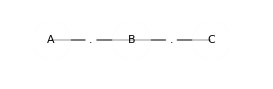

In [23]:
def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G


G=getpathgraph("ABC")

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g1 = G.copy()

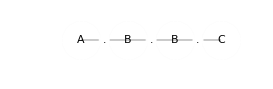

In [24]:
G=getpathgraph('ABBC')

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g2 = G.copy()

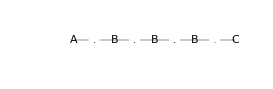

In [25]:
G=getpathgraph('ABBBC')

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g3 = G.copy()

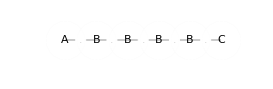

In [26]:
G=getpathgraph('ABBBBC')


from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g4 = G.copy()

In [27]:
%%time
import sys
sys.path.append('..')
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g1,g2,g3,g4,g4]



sampler=gl.Sampler(radius_list=[0,1],thickness_list=[2],
            min_cip_count=1,
            min_interface_count=1)
sampler.fit(gr,
            grammar_n_jobs=-1)

#instances: 5  #interfaces: 10   #cores: 8   #core-interface-pairs: 21
CPU times: user 16 ms, sys: 24 ms, total: 40 ms
Wall time: 142 ms


interface id: 979108 [6 options]


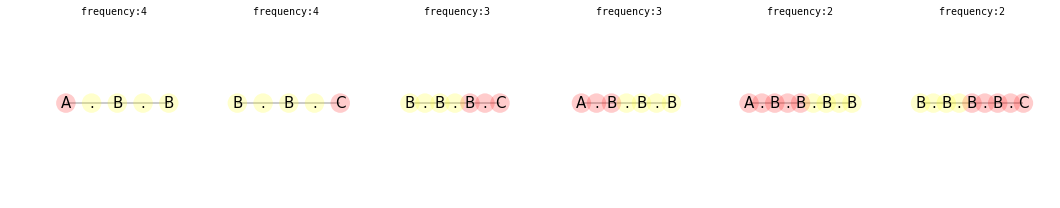

interface id: 1023600 [3 options]


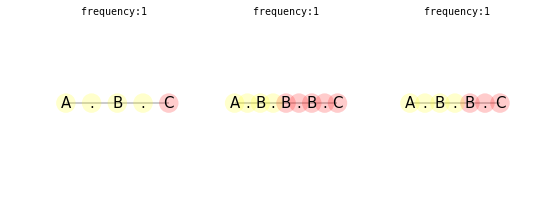

interface id: 959868 [3 options]


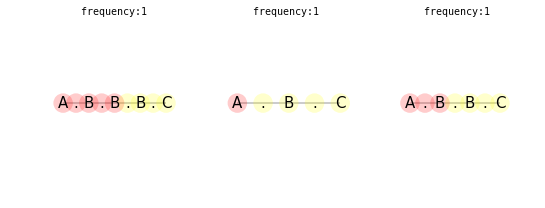

interface id: 929951 [2 options]


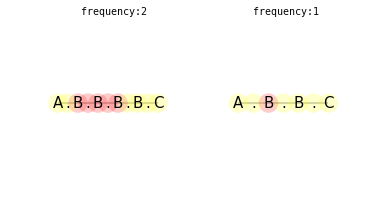

interface id: 619651 [2 options]


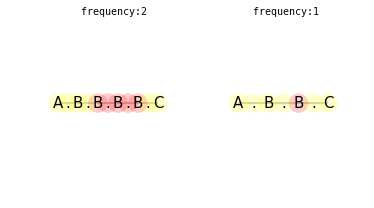

interface id: 1010521 [1 options]


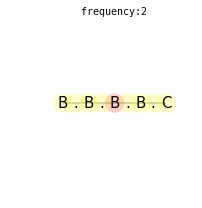

interface id: 632613 [1 options]


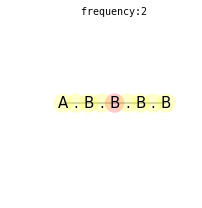

interface id: 428837 [1 options]


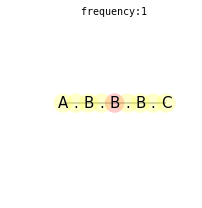

interface id: 341911 [1 options]


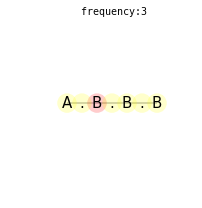

interface id: 273335 [1 options]


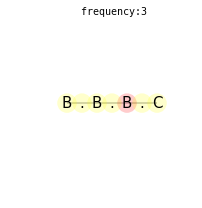

In [28]:
import graphlearn.utils.draw as draw
draw.draw_grammar(sampler.lsgg.productions,n_productions=None,
                     n_graphs_per_line=7, size=3, 
                     colormap='autumn', invert_colormap=True,
                     vertex_alpha=0.2, edge_alpha=0.2, node_size=380,
                     prog='circo', size_x_to_y_ratio=3)

how often do we see interface hashes
# productions: 21
x = # interfaces (total: 10)
y=number of cores(ihash), y=sum Of Core Counts(ihash)


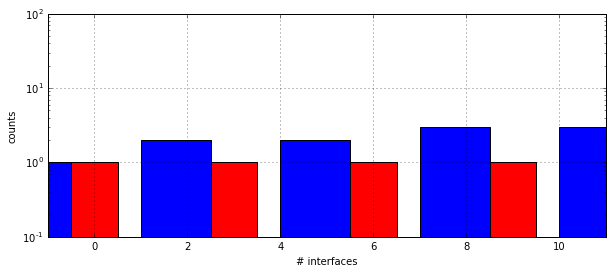

how often was this corehash seen?
x = # cores (total: 8)
y = in Y interfaces(chash), y= sum Of Count Over All Interfaces(chash)


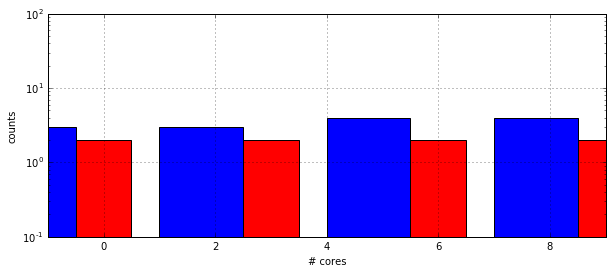

histogram
# productions: 21
distinct cores: 8 (seen on x axis)
interfaces with x many cores were observed y many times. 


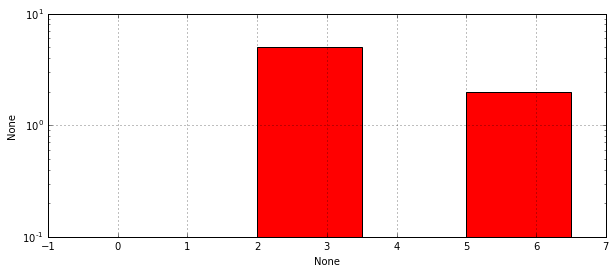

other histogram
how many cores exist with x many interfaces


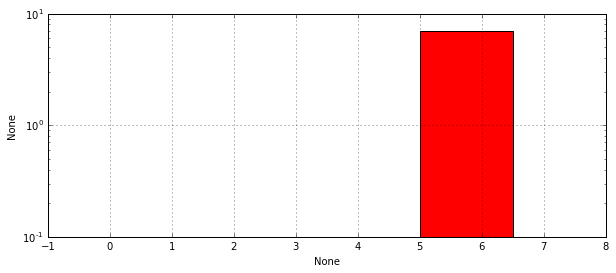

In [29]:
draw.draw_grammar_stats(sampler.lsgg.productions)

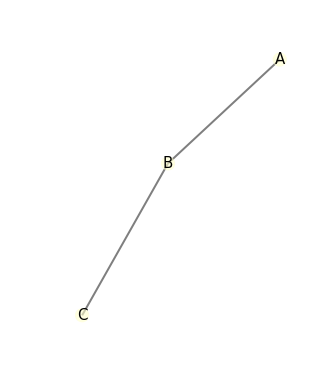

preprocessing grammar
_sample_notes: None
accept_min_similarity: 0.0
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
decomposer_generator: <function <lambda> at 0x7f014600b6e0>
estimatorobject: <graphlearn.estimate.OneClassEstimator instance at 0x7f014d57bab8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f014d57bb00>
graphtransformer: <graphlearn.transform.GraphTransformer object at 0x7f014d579490>
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: -1.0
improving_threshold: -1
include_seed: False
keep_duplicates: False
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f014c0ccf10>
max_core_size_diff: -2
maxbacktrack: 0
   monitor: False
  monitors: []
    n_jobs: 1
   n_steps: 50
      nbit: 20
node_entity_check: <function <lambda> at 0x7f014d57e7d0>
probabilistic_core_choice: True
proposal_probability: False
quick_skip_orig_cip: False
radius_list: [0, 2]
random_state: Non

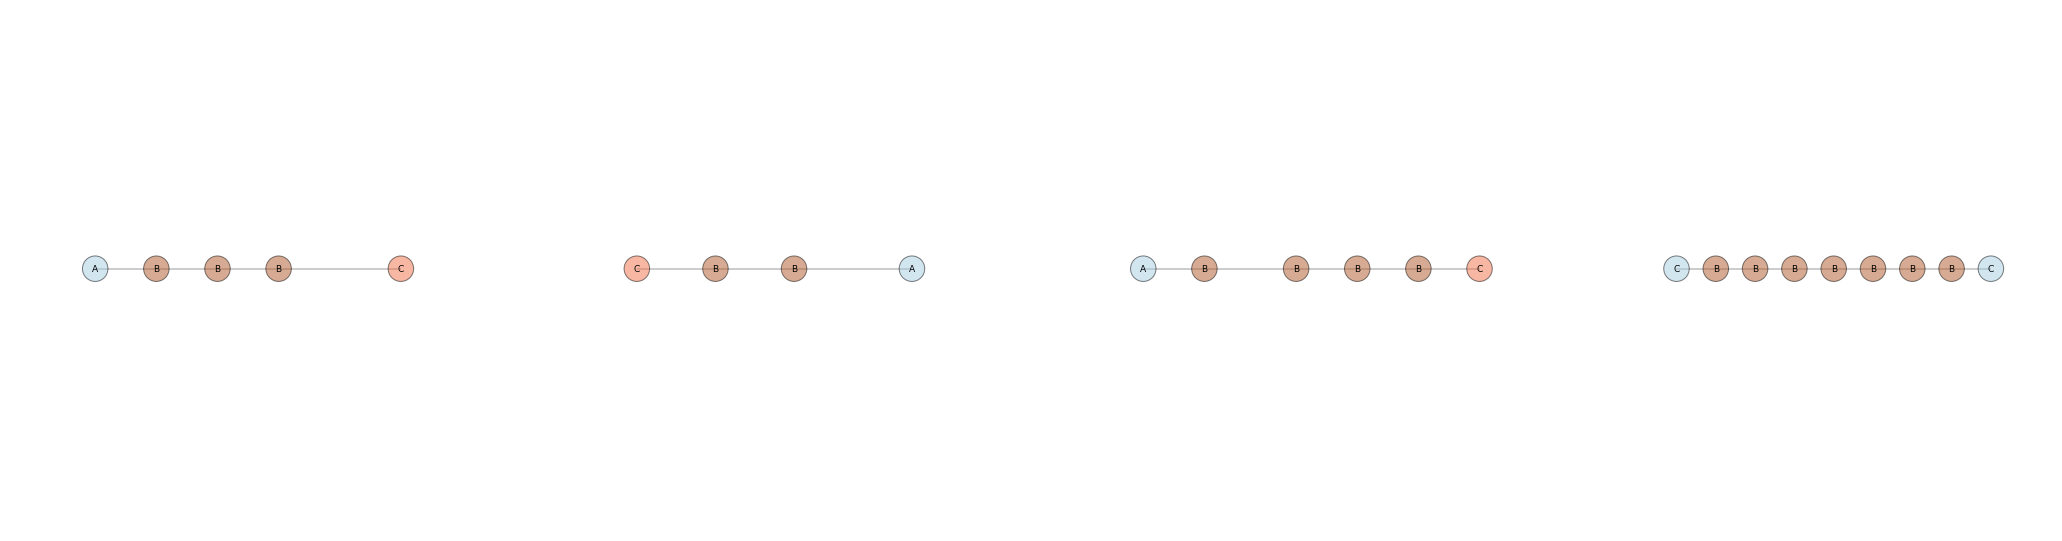

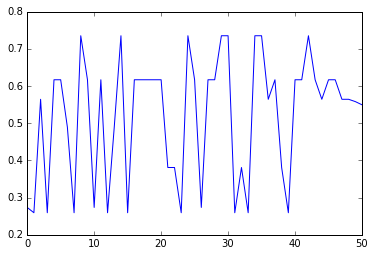

In [30]:
#sample
draw.graphlearn(g1)
seed_graphs = [g1]
n_steps=50
res = sampler.sample(seed_graphs,
                        max_size_diff=-1,
                        n_samples=10,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1)
#print 'asdasd',graphs
#draw
import matplotlib.pyplot as plt
scores=[]

for i,graphs in enumerate(list(res)):
    scores.append(sampler.monitors[i].sampling_info['score_history'])
    

    draw.draw_graph_set(graphs,
                           n_graphs_per_line=4, size=9,
                           prog='circo',
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650)
    
for h in scores: plt.plot(h)
plt.show()

##Note:
given that the string with more occurrences of 'b' is more frequent, then the tendency is to move towards a larger number of bs.

Note that if we keep on increasing the number of copies of one instance this becomes so popular that both the 50% least dense and the 50% more dense will contain the same number of instances and hence the direction of the signal will vanish.  

In [32]:
''' rewrite of directed sample happens later
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.directedsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg

steps=200
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger(''),verbosity=2)

#eg.Vectorizer(  normalization=False, inner_normalization=False, )

# so why do we fail if we use 10 here? 
vect=eg.Vectorizer( nbits= 17)


sampler= ds.directedSampler(thickness_list=[1],radius_list=[0,1,2], vectorizer=vect)


g1=getpathgraph('ABBBBBC')
food=[g1,g1,g1,g1,g1,g1]
target=getpathgraph('ABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBC')
target2=getpathgraph('ABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBC')
sampler.fit(food, n_jobs=1)


import scipy

graphs = sampler.sample(food,
                        #target_graph=target,
                        target_vector=   scipy.sparse.csr_matrix( sampler.get_average_vector([g1,target,target2])),
                        n_samples = 10,                   
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        same_core_size=False,
                        accept_annealing_factor=0,
                        accept_static_penalty= 1,
                        generatormode=False,
                        keep_duplicates=False,
                        probabilistic_core_choice=False
                        )


history=[]
for  i, gr in enumerate(graphs):
    print i,gr
    history.append(gr.graph['sampling_info']['score_history'])
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'],headlinehook=myutils.get_score_of_graph)
    
t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()

print sampler.get_average_vector([g1,target,target2])
'''

ImportError: No module named directedsampler